In [2]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
#plotting using traditional calculation
from mpl_toolkits import mplot3d
from matplotlib import cm
import scipy.optimize

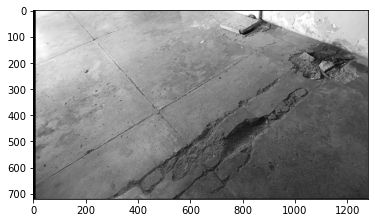

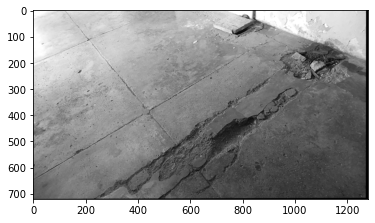

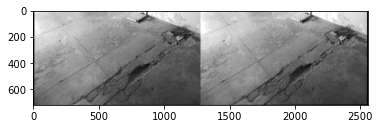

In [3]:
max_disparity = 96

H1 = np.array([[ 1.00047384e+00, -9.21142380e-04 , 1.05547668e+01],
 [-8.98002546e-04 , 9.98893992e-01, -5.28518968e-01],
 [ 7.41705741e-07, -3.17840628e-06 , 1.00062402e+00]])

H2 = np.array([[ 1.00499352e+00 , 2.38408626e-03 ,-9.01707400e+00],
 [ 2.31503605e-03 , 1.00108968e+00, -3.93138454e+00],
 [ 7.67580780e-06 , 3.18005952e-06 , 9.93872447e-01]])

left_image = cv2.imread('left_image1.png')
right_image = cv2.imread('rightt_image1.png')

left_image_gray = cv2.cvtColor(left_image, cv2.COLOR_BGR2GRAY)
right_image_gray = cv2.cvtColor(right_image, cv2.COLOR_BGR2GRAY)

left_img_rect = cv2.warpPerspective(left_image_gray, H1, left_image_gray.shape[::-1],
                                    cv2.INTER_CUBIC +
                                    cv2.WARP_FILL_OUTLIERS +
                                    cv2.WARP_INVERSE_MAP)

right_img_rect = cv2.warpPerspective(right_image_gray, H2, right_image_gray.shape[::-1],
                                    cv2.INTER_CUBIC +
                                    cv2.WARP_FILL_OUTLIERS +
                                    cv2.WARP_INVERSE_MAP)
lz_rectified = cv2.hconcat([left_img_rect, right_img_rect])

# stereoProcessor = cv2.StereoSGBM_create(
#             minDisparity=5,
#             numDisparities=60,
#             blockSize=5,
#             P1=50, # 250
#             P2=800, # 500
#             disp12MaxDiff=-5,
#             mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
#         )

win_size = -2
min_disp =-2
max_disp =0
num_disp =70 # Needs to be divisible by 16
stereoProcessor = cv2.StereoSGBM_create(
    minDisparity=min_disp,
    numDisparities=num_disp,
    blockSize=5,
    uniquenessRatio=5,
    speckleWindowSize=10,
    speckleRange=10,
    disp12MaxDiff=10,
    P1=10,
    P2=700,
    preFilterCap = 10,
    mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY,
)

# win_size = 2
# min_disp =-2
# max_disp = 5
# num_disp =8  # Needs to be divisible by 16
# stereoProcessor = cv2.StereoSGBM_create(
#     minDisparity=min_disp,
#     numDisparities=num_disp,
#     blockSize=3,
#     uniquenessRatio=5,
#     speckleWindowSize=400,
#     speckleRange=200,
#     disp12MaxDiff=1,
#     P1=100,
#     P2=1000,
#     preFilterCap = 20,
#     mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY,
# )

dis = stereoProcessor.compute(left_img_rect, right_img_rect)
# disparity = stereoProcessor.compute(right_img_rect, left_img_rect)

dis = dis[0:dis.shape[0], max_disparity:dis.shape[1]]

height = left_image.shape[0]
width = left_image.shape[1]
# print(disparity)

plt.imshow(left_img_rect, "gray")
plt.show()
plt.imshow(right_img_rect,"gray")
plt.show()
plt.imshow(lz_rectified,"gray")
plt.show()
# plt.imshow(disparity, "gray")
# plt.colorbar()
# plt.show()


[[ 0 88 88 ...  0  0  0]
 [ 0 88 88 ...  0  0  0]
 [88 88 88 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


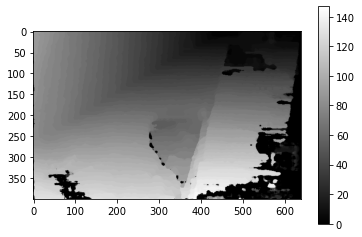

In [4]:
disparity = np.load('image_0.npy')
print(disparity)
plt.imshow(disparity, "gray")
plt.colorbar()
plt.show()

In [5]:
#3D Reprojection
image_centre_h = height/2
image_centre_w = width/2

''' Projects points from 2d to 3d using disparity to calculate Z coordinates'''

points = []

f = 800.74853515625
B = 0.075

height1, width1 = disparity.shape[:2]

# assume a minimal disparity of 2 pixels is possible to get Zmax
# and then get reasonable scaling in X and Y output

#Zmax = ((f * B) / 2)
a=0
x3d=[]
y3d=[]
z3d=[]

for y in range(height1):# 0 - height is the y axis index
    for x in range(width1):# 0 - width is the x axis index

        # if we have a valid non-zero disparity
        if (disparity[y,x] > 0 or disparity[y,x] < 0):

            # calculate corresponding 3D point [X, Y, Z]

            # stereo lecture - slide 22 + 25

            Z = (f * B) / disparity[y,x]

            X = ((x - image_centre_w) * B) / disparity[y,x]
            Y = ((y - image_centre_h) * Z) / disparity[y,x]

            # add to points
            x3d.append(X)
            y3d.append(Y)
            z3d.append(Z)

#             if(left_img_rect.size > 0):
#                 points.append([X,Y,Z,left_img_rect[y,x]])
#             else:
            points.append([X,Y,Z])
# X1=np.reshape(x3d,(height1 , width1))
# Y1=np.reshape(y3d,(height1 , width1))
# Z1=np.reshape(z3d,(height1 , width1))
# print(x3d)
# print(y3dZ
# print(z3d)
# print(X1)
# print(Y1)
# print(Z1)

In [17]:
x1 = X1[40,1]
y1 = Y1[40,1]
z1 = Z1[40,1]
x2 = X1[190,102]
y2 = Y1[190,102]
z2 = Z1[190,102]
x3 = X1[300,300]
y3 = Y1[300,300]
z3 = Z1[300,300]
x4 = X1[450,580]
y4 = Y1[450,580]
z4 = Z1[450,580]
x5 = X1[610,810]
y5 = Y1[610,810]
z5 = Z1[610,810]
x6 = X1[713,1000]
y6 = Y1[713,1000]
z6 = Z1[713,1000]
print(x1 , y1,z1)
print(x2 , y2,z2)
print(x3 , y3,z3)
print(x4 , y4,z4)
Sx = x1+x2+x3+x4+x5+x6
Sz = z1+z2+z3+z4+z5+z6
Sx2 = x1*x1+x2*x2+x3*x3+x4*x4+x5*x5+x6*x6
Sxz = x1*z1 + x2*z2 + x3*z3 + x4*z4 + x5*z5 + x6*z6
Sz2 = z1*z1+z2*z2+z3*z3+z4*z4+z5*z5+z6*z6
Sx3 = x1*x1*x1+x2*x2*x2+x3*x3*x3+x4*x4*x4+x5*x5*x5+x6*x6*x6
Sx2z = (x1*x1)*z1+(x2*x2)*z2+(x3*x3)*z3+(x4*x4)*z4+(x5*x5)*z5+(x6*x6)*z6
Sxz2 = x1*(z1*z1)+x2*(z2*z2)+x3*(z3*z3)+x4*(z4*z4)+x5*(z5*z5)+x6*(z6*z6)
Sz3 = z1*z1*z1+z2*z2*z2+z3*z3*z3+z4*z4*z4+z5*z5*z5+z6*z6*z6
Sx4 = x1*x1*x1*x1+x2*x2*x2*x2+x3*x3*x3*x3+x4*x4*x4*x4+x5*x5*x5*x5+x6*x6*x6*x6
Sx3z2 = (x1*x1*x1)*(z1*z1)+(x2*x2*x2)*(z2*z2)+(x3*x3*x3)*(z3*z3)+(x4*x4*x4)*(z4*z4)+(x5*x5*x5)*(z5*z5)+(x6*x6*x6)*(z6*z6)
Sx3z = (x1*x1*x1)*(z1)+(x2*x2*x2)*(z2)+(x3*x3*x3)*(z3)+(x4*x4*x4)*(z4)+(x5*x5*x5)*(z5)+(x6*x6*x6)*(z6)
Sx2z2 = (x1*x1)*(z1*z1)+(x2*x2)*(z2*z2)+(x3*x3)*(z3*z3)+(x4*x4)*(z4*z4)+(x5*x5)*(z5*z5)+(x6*x6)*(z6*z6)
Sxz3 = x1*(z1*z1*z1)+x2*(z2*z2*z2)+x3*(z3*z3*z3)+x4*(z4*z4*z4)+x5*(z5*z5*z5)+x6*(z6*z6*z6)
Sz4 = z1*z1*z1*z1+z2*z2*z2*z2+z3*z3*z3*z3+z4*z4*z4*z4+z5*z5*z5*z5+z6*z6*z6*z6
print()
print(Sx)
print(Sz)
print(Sx2)
print(Sxz)
print(Sz2)
print()
print(Sx3)
print(Sx2z)
print(Sxz2)
print(Sz3)
print()
print(Sx4)
print(Sx3z2)
print(Sx3z)
print(Sx2z2)
print(Sxz3)
print(Sz4)

Sy = y1+y2+y3+y4+y5+y6
Sxy = x1*y1 + x2*y2 + x3*y3 + x4*y4 + x5*y5 + x6*y6
Szy = z1*y1 + z2*y2 + z3*y3 + z4*y4 + z5*y5 + z6*y6
Sx2y = (x1*x1)*y1+(x2*x2)*y2+(x3*x3)*y3+(x4*x4)*y4+(x5*x5)*y5+(x6*x6)*y6
Sxyz = (x1*y1)*z1+(x2*y2)*z2+(x3*y3)*z3+(x4*y4)*z4+(x5*y5)*z5+(x6*y6)*z6
Sz2y = y1*(z1*z1)+y2*(z2*z2)+y3*(z3*z3)+y4*(z4*z4)+y5*(z5*z5)+y6*(z6*z6)
print()
print(Sy)
print(Sxy)
print(Szy)
print(Sx2y)
print(Sxyz)
print(Sz2y)
print()
print()
print(Sz,"a0 + " ,Sxz,"a1+ ", Sz2, "a2 + ",Sx2z,"a3 + ",Sxz2,"a4 + ",Sz3,"a5") 
print(Sx2,"a0 + " ,Sx3,"a1+ ", Sx2z, "a2 + ",Sx4,"a3 + ",Sx3z2,"a4 + ",Sx3z,"a5 =",Sx2y)
print(Sxz,"a0 + " ,Sx2z,"a1+ ", Sxz2, "a2 + ",Sx3z,"a3 + ",Sx2z2,"a4 + ",Sxz3,"a5 =",Sxyz)
print(Sz2,"a0 + " ,Sxz2,"a1+ ", Sz3, "a2 + ",Sx2z2,"a3 + ",Sxz3,"a4 + ",Sz4,"a5 =",Sz2y)

IndexError: index 450 is out of bounds for axis 0 with size 400

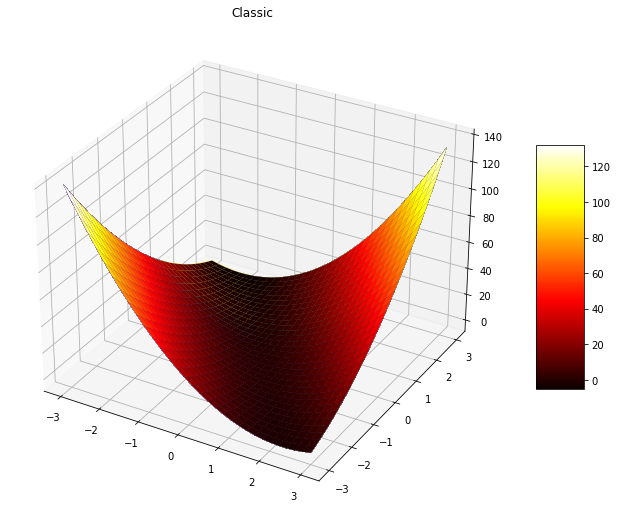

In [29]:

%matplotlib inline
# yn=[]
# for i in range(0,len(x3d)):
#     y2049 = 0.06958 + -0.45284*x3d[i] + -0.89187*z3d[i] +  5.10759*x3d[i]*x3d[i] + 7.65875*x3d[i]*z3d[i] + 2.41661*z3d[i]*z3d[i]
#     yn.append(y2049)
    
# Y2=np.reshape(yn,(height1 , width1))
x = np.outer(np.linspace(-3, 3, 32), np.ones(32))
z = x.copy().T # transpose
y = 0.06958 - 0.45284*x - 0.89187*z +  5.10759*x*x + 7.65875*x*z + 2.41661*z*z

 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_title('Classic')
ax.plot_surface(x,z,y,linewidth=0, antialiased=False, shade = True, alpha = 0.5, facecolors=cm.viridis(z))
surf3 = ax.plot_surface(x,z, y,
                       cmap = my_cmap,
                       edgecolor ='none')
fig.colorbar(surf3, shrink=0.5, aspect=5)
plt.show()
# show plot
plt.show()

In [6]:
#finding coeff using ordinary least squares on sklearn

reg = linear_model.LinearRegression()
# reg.precision(2)
reg.fit([[6,Sx,Sz,Sx2,Sxz,Sz2],[Sx,Sx2,Sxz,Sx3,Sx2z,Sxz2],[Sz,Sxz,Sz2,Sx2z,Sxz2,Sz3],[Sx2,Sx3,Sx2z,Sx4,Sx3z2,Sx3z],[Sxz,Sx2z,Sxz2,Sx3z,Sx2z2,Sxz3],[Sz2,Sxz2,Sz3,Sx2z2,Sxz3,Sz4]], [[Sy],[Sxy],[Szy],[Sx2y],[Sxyz],[Sz2y]])
# LinearRegression()
amat = reg.coef_
yn1=[]
for i in range(0,len(x3d)):
    y2049k =  amat[0,0]+ amat[0,1]*x3d[i] + amat[0,2]*z3d[i] +  amat[0,3]*x3d[i]*x3d[i] + amat[0,4]*x3d[i]*z3d[i] + amat[0,5]*z3d[i]*z3d[i]
    yn1.append(y2049k)
print(amat)
Y3=np.reshape(yn1,(height1 , width1))

NameError: name 'Sx' is not defined

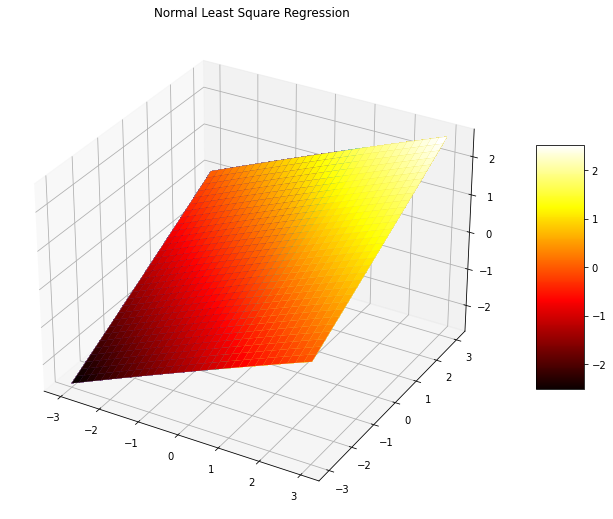

In [92]:
x = np.outer(np.linspace(-3, 3, 32), np.ones(32))
z = x.copy().T # transpose
y = amat[0,0]+ amat[0,1]*x + amat[0,2]*z +  amat[0,3]*x*x + amat[0,4]*x*z + amat[0,5]*z*z

 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
 
# Creating color map
my_cmap = plt.get_cmap('hot')
 
# # Creating plot
# surf = ax.plot_surface(x, y, z,
#                        cmap = my_cmap,
#                        edgecolor ='none')
 
# fig.colorbar(surf, ax = ax,
#              shrink = 0.5, aspect = 5)
 
ax.set_title('Normal Least Square Regression')
ax.plot_surface(z,x,y,linewidth=0, antialiased=False, shade = True, alpha = 0.5, facecolors=cm.viridis(z))
surf3 = ax.plot_surface(z, x, y,
                       cmap = my_cmap,
                       edgecolor ='none')
fig.colorbar(surf3, shrink=0.5, aspect=5)
plt.show()
# show plot
plt.show()

In [6]:
sx1=0
SMx =[]
sz1=0
SMz =[]
sz2=0
SMz2 =[]
sx2=0
SMx2 =[]
sx3=0
SMx3 =[]
sxz=0
SMxz =[]
sx2z=0
SMx2z =[]
sxz2=0
SMxz2 =[]
sz3=0
SMz3 =[]
sx4 = 0
SMx4=[]
sz4 = 0
SMz4=[]
sx3z = 0
SMx3z=[]
sx3z2 = 0
SMx3z2=[]
sx2z2=0
SMx2z2 =[]
sxz3=0
SMxz3 =[]
sy1=0
SMy1 =[]
sxy=0
SMxy =[]
szy=0
SMzy =[]
sx2y=0
SMx2y =[]
sxyz =0
SMxyz = []
sz2y=0
SMz2y =[]
sy1=0
SMy=[]
s=0
for i in range(len(x3d)):
    s= s+i
    sx1 = sx1 + x3d[i]
    SMx.append(sx1)
    sz1 = sz1 + z3d[i]
    SMz.append(sz1)
    sx2 = sx2+ x3d[i]**2
    SMx2.append(sx2)
    sz2 = sz2 + z3d[i]**2
    SMz2.append(sz2)
    sxz = sxz + x3d[i]*z3d[i]
    SMxz.append(sxz)
    sx3 = sx3+ x3d[i]**3
    SMx3.append(sx3)
    sx2z = sx2z+ (x3d[i]**2)*(z3d[i])
    SMx2z.append(sx2z)
    sxz2 = sxz2 + (x3d[i])*(z3d[i]**2)
    SMxz2.append(sxz2)
    sz3 = sz3 + z3d[i]**3
    SMz3.append(sz3)
    sx4 = sx4 + x3d[i]**4
    SMx4.append(sx4)
    sz4 = sz4 + z3d[i]**4
    SMz4.append(sz4)
    sx3z2 = sx3z2 +(x3d[i]**3)*(z3d[i]**2)
    SMx3z2.append(sx3z2)
    sx3z = sx3z + (x3d[i]**3)*(z3d[i])
    SMx3z2.append(sx3z)
    sx2z2 = sx2z2 + (x3d[i]**2)*(z3d[i]**2)
    SMx2z2.append(sx2z2)
    sxz3 = sxz3 + (x3d[i])*(z3d[i]**3)
    SMxz3.append(sxz3)
    sy1 = sy1 + y3d[i]
    SMy.append(sy1)
    sxy = sxy + x3d[i]*y3d[i]
    SMxy.append(sxy)
    szy = szy + z3d[i]*y3d[i]
    SMzy.append(szy)
    sx2y = sx2y + (x3d[i]**2)*(y3d[i])
    SMx2y.append(sx2y)
    sxyz = sxyz + (x3d[i])*(y3d[i])*(z3d[i])
    SMxyz.append(sxyz)
    sz2y = sz2y + (z3d[i]**2)*(y3d[i])
    SMz2y.append(sz2y)

In [7]:
#plot using ridge regression
reg1 = linear_model.Ridge(alpha=.5)
reg1.fit([[s,sx1,sz1,sx2,sxz,sz2],[sx1,sx2,sxz,sx3,sx2z,sxz2],[sz1,sxz,sz2,sx2z,sxz2,sz3],[sx2,sx3,sx2z,sx4,sx3z2,sx3z],[sxz,sx2z,sxz2,sx3z,sx2z2,sxz3],[sz2,sxz2,sz3,sx2z2,sxz3,sz4]], [[sy1],[sxy],[szy],[sx2y],[sxyz],[sz2y]])
amat1=reg1.coef_
# reg1.intercept_
print(amat1)

[[-1.47123993e-06  2.06310324e+00  5.22421064e+00 -1.34363133e+01
   9.65048714e-01 -4.75721555e+00]]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.38379e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


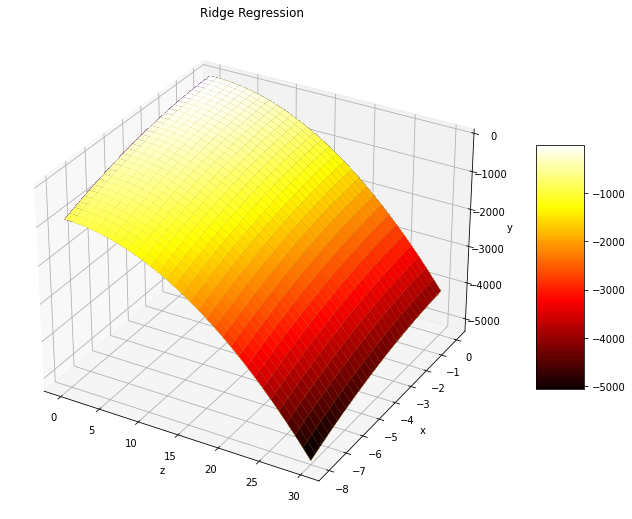

In [8]:
x1 = np.outer(np.linspace(-8, 0, 32), np.ones(32))
# z1 = x1.copy().T # transpose
z1 = np.outer(np.linspace(0, 30, 32), np.ones(32)).T
y1 = amat1[0,0]+ amat1[0,1]*x1 + amat1[0,2]*z1 +  amat1[0,3]*x1*x1 + amat1[0,4]*x1*z1 + amat1[0,5]*z1*z1

# Creating figure
fig = plt.figure(figsize =(14, 9))
# ax = plt.axes(projection ='3d')
my_cmap = plt.get_cmap('hot')
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Ridge Regression')
ax.plot_surface(z1,x1,y1,linewidth=0, antialiased=False, shade = True, alpha = 0.5, facecolors=cm.viridis(z1))
surf3 = ax.plot_surface(z1, x1, y1,
                       cmap = my_cmap,
                       edgecolor ='none')
ax.set_xlabel('z')
ax.set_ylabel('x')
ax.set_zlabel('y')
# ax.scatter(Z1, X1, Y1)
fig.colorbar(surf3, shrink=0.5, aspect=5)
plt.show()
# show plot

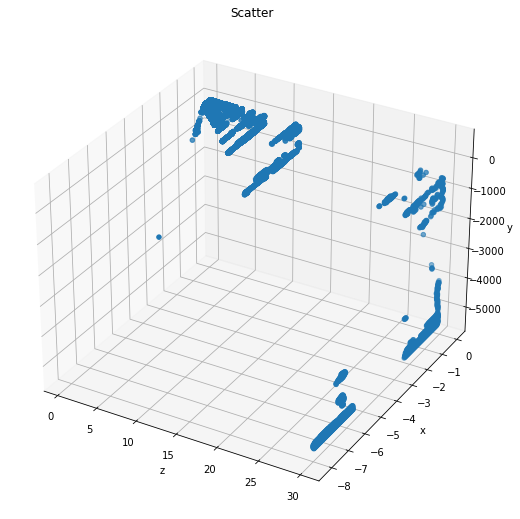

In [41]:
fig = plt.figure(figsize =(14, 9))
# ax = plt.axes(projection ='3d')
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Scatter')
# ax.plot_surface(z1,x1,y1,linewidth=0, antialiased=False, shade = True, alpha = 0.5, facecolors=cm.viridis(Z1))
# surf3 = ax.plot_surface(z1, x1, y1,
#                        cmap = my_cmap,
#                        edgecolor ='none')
ax.set_xlabel('z')
ax.set_ylabel('x')
ax.set_zlabel('y')
ax.scatter(z3d, x3d, y3d)
# fig.colorbar(surf3, shrink=0.5, aspect=5)
plt.show()

-0.6 -0.1078125 -5.2687340524696005
-0.5990624999999999 -0.1078125 -5.25101666518546
-0.598125 -0.1078125 -5.23332289642082
-0.5971875 -0.1078125 -5.215652746175678
-0.59625 -0.1078125 -5.198006214450034
-0.5953125 -0.1078125 -5.180383301243891
-0.594375 -0.1078125 -5.162784006557244
-0.5934375000000001 -0.1078125 -5.145208330390099
-0.5925 -0.1078125 -5.12765627274245
-0.5915625 -0.1078125 -5.110127833614301
-0.590625 -0.1078125 -5.09262301300565
-0.5896874999999999 -0.1078125 -5.075141810916499
-0.58875 -0.1078125 -5.057684227346846
-0.5878125 -0.1078125 -5.040250262296693
-0.6097402597402597 -0.11201298701298701 -5.531594612049953
-0.6087662337662337 -0.11201298701298701 -5.512904974498613
-0.6077922077922078 -0.11201298701298701 -5.494240831722916
-0.6068181818181818 -0.11201298701298701 -5.475602183722863
-0.6058441558441559 -0.11201298701298701 -5.456989030498454
-0.6048701298701298 -0.11201298701298701 -5.438401372049688
-0.6038961038961039 -0.11201298701298701 -5.41983920837656

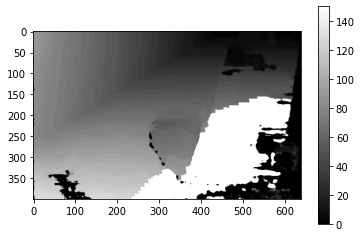

In [13]:
x_pothole=[]
y_pothole=[]
fit=[]
disp = disparity.copy()
for y in range(height1):
    for x in range(width1):
        if (disparity[y,x] > 0 or disparity[y,x] < 0):
            K = (f * B) / disparity[y,x]
            I = ((x - image_centre_w) * B) / disparity[y,x]
            J = ((y - image_centre_h) * B) / disparity[y,x]
            yc = amat1[0,0]+ amat1[0,1]*I + amat1[0,2]*K +  amat1[0,3]*I*I + amat1[0,4]*I*K + amat1[0,5]*K*K
            if(y==245 and (x>340 or x<360)):
                print(I,J,yc)
            diff = J - yc
            if(J < yc):
                disp[y,x] = 150
        #         yc = amat3[0]+ amat3[1]*X1[i,j] + amat3[2]*Z1[i,j] +  amat3[3]*X1[i,j]*X1[i,j] + amat3[4]*X1[i,j]*Z1[i,j] + amat3[5]*Z1[i,j]*Z1[i,j]
# yc = 0.06958 - 0.45284*X1[i,j] - 0.89187*Z1[i,j] +  5.10759*X1[i,j]*X1[i,j] + 7.65875*X1[i,j]*Z1[i,j] + 2.41661*Z1[i,j]*Z1[i,j]
# for i in range(len(x3d)):
#     yc = amat1[0,0]+ amat1[0,1]*x3d[i] + amat1[0,2]*z3d[i] +  amat1[0,3]*x3d[i]*x3d[i] + amat1[0,4]*x3d[i]*z3d[i] + amat1[0,5]*z3d[i]*z3d[i]
#     v = Y1[i,j] + yc
#     if(y3d[i] < yc):
#         x_pothole.append(j)
#         y_pothole.append(i)
#     fit.append(yc)
# print(np.reshape(fit,(height1 , width1)))
#print(fit)
# for i in range(len(x3d)):
#     if(y3d[i]<fit[i]):
#         j=round((y3d[i]*Z)/f + image_centre_h)
#         i=round((x3d[i]*Z)/f + image_centre_w)
#         x_pothole.append(i)
#         y_pothole.append(j)
# for i in range(len(y_pothole)):
#     disp[y_pothole[i],x_pothole[i]] = 800
plt.imshow(disp, "gray")
plt.colorbar()
plt.show()


In [22]:
#plot using random weights for weighted least squares
sample_weight = np.ones(6) * 6
sample_weight[-2:] *= 30
regr = linear_model.LinearRegression()
regr.fit([[6,Sx,Sz,Sx2,Sxz,Sz2],[Sx,Sx2,Sxz,Sx3,Sx2z,Sxz2],[Sz,Sxz,Sz2,Sx2z,Sxz2,Sz3],[Sx2,Sx3,Sx2z,Sx4,Sx3z2,Sx3z],[Sxz,Sx2z,Sxz2,Sx3z,Sx2z2,Sxz3],[Sz2,Sxz2,Sz3,Sx2z2,Sxz3,Sz4]], [[Sy],[Sxy],[Szy],[Sx2y],[Sxyz],[Sz2y]], sample_weight)
amat2=regr.coef_
print(amat2)
# reg1.intercept_

[[ 0.04469003  0.20196427 -0.36424051 -0.20893872  0.11929376  0.03806944]]


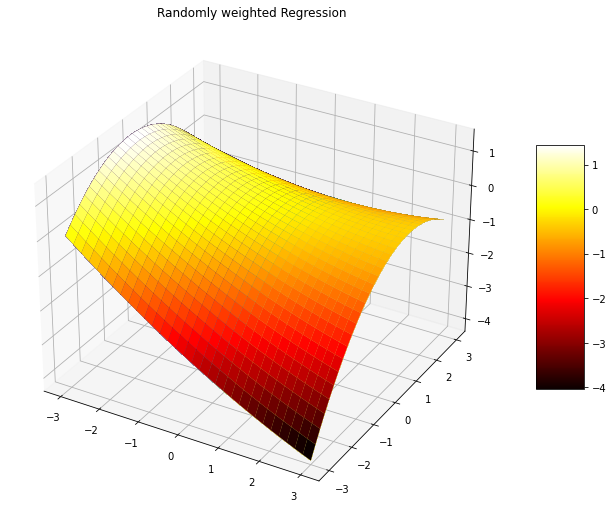

In [23]:
x = np.outer(np.linspace(-3, 3, 32), np.ones(32))
z = x.copy().T # transpose
y = amat2[0,0]+ amat2[0,1]*x + amat2[0,2]*z +  amat2[0,3]*x*x + amat2[0,4]*x*z + amat2[0,5]*z*z

 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_title('Randomly weighted Regression')
ax.plot_surface(z,x,y,linewidth=0, antialiased=False, shade = True, alpha = 0.5, facecolors=cm.viridis(z))
surf3 = ax.plot_surface(z, x, y,
                       cmap = my_cmap,
                       edgecolor ='none')
fig.colorbar(surf3, shrink=0.5, aspect=5)
plt.show()
# show plot
plt.show()

In [55]:
import numpy as np
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.datasets import make_regression
#rng = np.random.RandomState(0)
#X, y, coef = make_regression(
     #n_samples=200, n_features=2, noise=4.0, coef=True, random_state=0)
#X[:4] = rng.uniform(10, 20, (4, 2))
#y[:4] = rng.uniform(10, 20, 4)
huber = HuberRegressor().fit([[6,sx1,sz1,sx2,sxz,sz2],[sx1,sx2,sxz,sx3,sx2z,sxz2],[sz1,sxz,sz2,sx2z,sxz2,sz3],[sx2,sx3,sx2z,sx4,sx3z2,sx3z],[sxz,sx2z,sxz2,sx3z,sx2z2,sxz3],[sz2,sxz2,sz3,sx2z2,sxz3,sz4]], [[sy1],[sxy],[szy],[sx2y],[sxyz],[sz2y]])
huber.score([[6,sx1,sz1,sx2,sxz,sz2],[sx1,sx2,sxz,sx3,sx2z,sxz2],[sz1,sxz,sz2,sx2z,sxz2,sz3],[sx2,sx3,sx2z,sx4,sx3z2,sx3z],[sxz,sx2z,sxz2,sx3z,sx2z2,sxz3],[sz2,sxz2,sz3,sx2z2,sxz3,sz4]], [[sy1],[sxy],[szy],[sx2y],[sxyz],[sz2y]])
#huber.predict(X[:1,])
# #linear = LinearRegression().fit(X, y)
# print("True coefficients:", coef)
print("Huber coefficients:", huber.coef_)
# print("Linear Regression coefficients:", linear.coef_)
amat3=huber.coef_
# reg1.intercept_

Huber coefficients: [ 1.46687525e-13  5.40952930e-02 -8.93128433e-02 -4.25912632e-03
  2.90856392e-03  9.54525433e-04]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


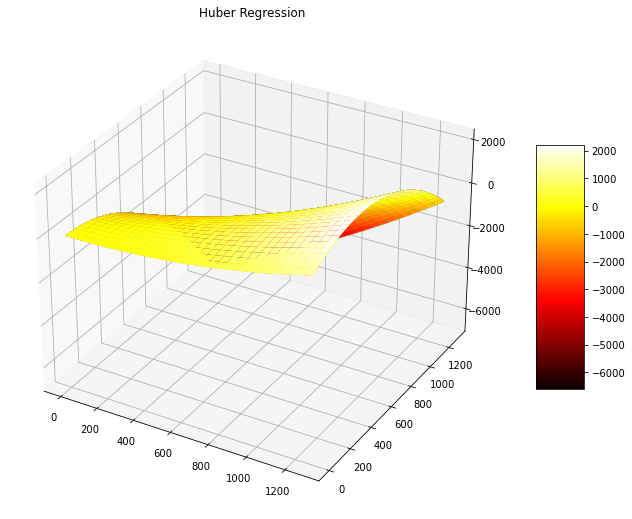

In [103]:
x = np.outer(np.linspace(0, width, 32), np.ones(32))
z = x.copy().T # transpose
y = amat3[0]+ amat3[1]*x + amat3[2]*z +  amat3[3]*x*x + amat3[4]*x*z + amat3[5]*z*z

 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_title('Huber Regression')
ax.plot_surface(z,x,y,linewidth=0, antialiased=False, shade = True, alpha = 0.5, facecolors=cm.viridis(Z1))
surf3 = ax.plot_surface(z, x, y,
                       cmap = my_cmap,
                       edgecolor ='none')
fig.colorbar(surf3, shrink=0.5, aspect=5)
plt.show()
# show plot
plt.show()

In [14]:
A= np.outer(np.linspace(-2, 2, 10), np.ones(10))
B = A.copy()
yx=[]
for i in range(0,len(A)):
    y201 =  amat1[0,0]+ amat1[0,1]*A[i] + amat1[0,2]*B[i] +  amat1[0,3]*A[i]*A[i] + amat1[0,4]*A[i]*B[i] + amat1[0,5]*B[i]*B[i]
    yx.append(y201)
from matplotlib import cm
ax = plt.axes(projection ='3d')
ax.plot_surface(B,A,yx,linewidth=0, antialiased=False, shade = True, alpha = 0.5, facecolors=cm.viridis(Z1))
surf3 = ax.plot_surface(B, A, yx,
                       cmap = my_cmap,
                       edgecolor ='none')
fig.colorbar(surf3, shrink=0.5, aspect=5)
plt.show()

NameError: name 'amat1' is not defined

<function matplotlib.pyplot.show(close=None, block=None)>

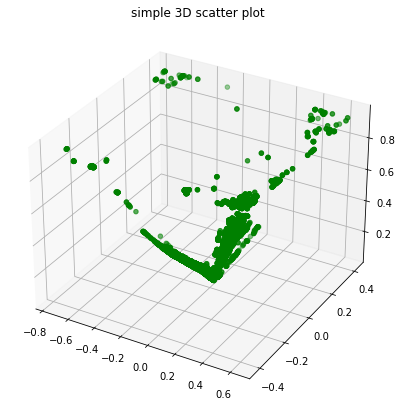

In [25]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(x3d, y3d, z3d, color = "green")
plt.title("simple 3D scatter plot")
plt.show

C:\Users\Admin\AppData\Local\Temp/ipykernel_28536/2726872423.py:52: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bound_gt = np.full(shape=num_coeff, fill_value=0, dtype=np.float)
C:\Users\Admin\AppData\Local\Temp/ipykernel_28536/2726872423.py:53: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bound_lt = np.full(shape=num_coeff, fill_value

lst_sqrs_result =
 active_mask: array([ 0,  0, -1,  0,  0,  0])
        cost: 6.975930650232612e-07
         fun: array([ 5.81922263e-06, -7.92836392e-07, -1.65316461e-04,  6.76156525e-04,
       -8.81461743e-04,  3.65594933e-04])
        grad: array([-3.60353938e-10,  1.90651859e-12,  3.34272468e-06, -1.18731475e-13,
        2.30049987e-13,  5.59149985e-07])
         jac: array([[ 1.00000000e+00, -2.03072034e-01,  2.54475171e-01,
         4.12382514e-02, -5.16767904e-02,  6.47576116e-02],
       [ 1.00000000e+00, -1.02151899e-01,  1.52040861e-01,
         1.04350105e-02, -1.55312628e-02,  2.31164233e-02],
       [ 1.00000000e+00, -4.80225987e-02,  1.13100076e-01,
         2.30616999e-03, -5.43135958e-03,  1.27916271e-02],
       [ 1.00000000e+00, -6.53120468e-03,  8.71642092e-02,
         4.26566161e-05, -5.69287297e-04,  7.59759941e-03],
       [ 1.00000000e+00,  1.50000001e-02,  7.06542826e-02,
         2.24999987e-04,  1.05981423e-03,  4.99202777e-03],
       [ 1.00000000e+00,  2.9

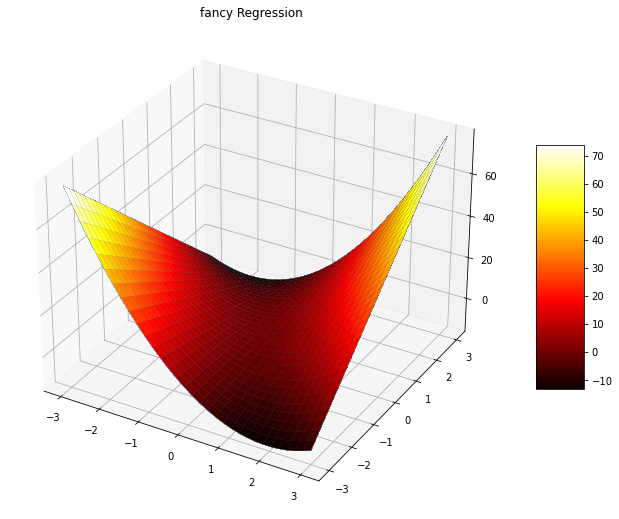

In [77]:
import numpy as np
import scipy.optimize

# ===============================================
# SETUP: define common compoments of the problem


def our_function(coeff, data):
    """
    The function we care to optimize.

    Args:
        coeff (np.ndarray): are the parameters that we care to optimize.
        data (np.ndarray): the input data
    """
    A, B, C,D,E,F = coeff
    x, y, z = data.T
    return (A+ B*x + C*z +  D*x*x + E*x*z + F*z*z - y)


# Define some training data
data = np.array([
    [x1, y1, z1],
    [x2, y2, z2],
    [x3, y3, z3],
    [x4, y4, z4],
    [x5, y5, z5],
    [x6, y6, z6]
])
# Define training target
# This is what we want the target function to be equal to
target = 0

# Make an initial guess as to the parameters
# either a constant or random guess is typically fine
num_coeff = 6
coeff_0 = np.ones(num_coeff)
# coeff_0 = np.random.rand(num_coeff)
def least_squares_residuals(coeff, data, target):
    """
    Function that returns the vector of residuals between the predicted values
    and the target value. Here we want each predicted value to be close to zero
    """
    A, B, C,D,E,F = coeff
    x, y, z = data.T
    prediction = our_function(coeff, data)
    vector_of_residuals = (prediction - target)
    return vector_of_residuals


# Here the bounds are specified in the optimization call
bound_gt = np.full(shape=num_coeff, fill_value=0, dtype=np.float)
bound_lt = np.full(shape=num_coeff, fill_value=np.inf, dtype=np.float)
bounds = (bound_gt, bound_lt)

lst_sqrs_result = scipy.optimize.least_squares(least_squares_residuals, coeff_0,
                                               args=(data, target), bounds=bounds)
# Test what the squared error of the returned result is
coeff = lst_sqrs_result.x
lst_sqrs_output = our_function(coeff, data)
print('====================')
print('lst_sqrs_result =\n%s' % (lst_sqrs_result,))
print('---------------------')
print('lst_sqrs_output = %r' % (lst_sqrs_output,))
print('====================')
x = np.outer(np.linspace(-3, 3, 32), np.ones(32))
z = x.copy().T # transpose
y = coeff[0]+ coeff[1]*x + coeff[2]*z +  coeff[3]*x*x + coeff[4]*x*z + coeff[5]*z*z

 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_title('fancy Regression')
ax.plot_surface(x,z,y,linewidth=0, antialiased=False, shade = True, alpha = 0.5, facecolors=cm.viridis(Z1))
surf3 = ax.plot_surface(x, z, y,
                       cmap = my_cmap,
                       edgecolor ='none')
fig.colorbar(surf3, shrink=0.5, aspect=5)
plt.show()
# show plot
plt.show()

[[-1.31866252e-01 -1.30667432e-01 -1.29483500e-01 ...  1.87604322e+00
   1.91816764e+00  1.96163539e+00]
 [-1.34495641e-01 -1.31955668e-01 -1.32044092e-01 ...  1.91346961e+00
   1.95683725e+00  2.00160172e+00]
 [-1.41406545e-01 -1.38677185e-01 -1.38770868e-01 ...  1.95204357e+00
   1.99670488e+00  2.04281926e+00]
 ...
 [ 2.70203967e-04  1.65564667e-04  1.13031405e-04 ...  3.71871654e-02
   3.72430134e-02  3.71209633e-02]
 [ 3.48200366e-04  2.44640226e-04  1.39666275e-04 ...  3.69661418e-02
   3.71096783e-02  3.73437289e-02]
 [ 3.22288361e-04  1.65564667e-04  8.63064868e-05 ...  3.69223335e-02
   3.70214532e-02  3.71652491e-02]]
[[-0.12980769 -0.1291866  -0.12857143 ... -0.27       -0.27272727
  -0.2755102 ]
 [-0.13070388 -0.12944712 -0.12944712 ... -0.2719697  -0.2747449
  -0.27757732]
 [-0.13358209 -0.13226601 -0.13226601 ... -0.27397959 -0.27680412
  -0.2796875 ]
 ...
 [ 0.03265244  0.0328125   0.03289312 ...  0.02771739  0.02771739
   0.02760309]
 [ 0.03262454  0.03278388  0.0329447

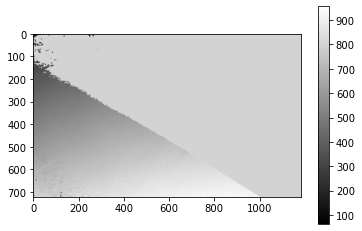

In [79]:
x_pothole=[]
y_pothole=[]
fit=[]
disp = disparity.copy()
for i in range(height1):
    for j in range(width1):
        yc = coeff[0]+ coeff[1]*X1[i,j] + coeff[2]*Z1[i,j] +  coeff[3]*X1[i,j]*X1[i,j] + coeff[4]*X1[i,j]*Z1[i,j] + coeff[5]*Z1[i,j]*Z1[i,j]
#         yc = amat3[0]+ amat3[1]*X1[i,j] + amat3[2]*Z1[i,j] +  amat3[3]*X1[i,j]*X1[i,j] + amat3[4]*X1[i,j]*Z1[i,j] + amat3[5]*Z1[i,j]*Z1[i,j]
# yc = 0.06958 - 0.45284*X1[i,j] - 0.89187*Z1[i,j] +  5.10759*X1[i,j]*X1[i,j] + 7.65875*X1[i,j]*Z1[i,j] + 2.41661*Z1[i,j]*Z1[i,j]
        v = Y1[i,j] + yc
        if(Y1[i,j] < yc):
            x_pothole.append(j)
            y_pothole.append(i)
        fit.append(yc)
print(np.reshape(fit,(height1 , width1)))
#print(fit)
print(Y1)
for i in range(len(y_pothole)):
    disp[y_pothole[i],x_pothole[i]] = 800
plt.imshow(disp, "gray")
plt.colorbar()
plt.show()

lst_sqrs_result =
 active_mask: array([0., 0., 0.])
        cost: 3.4371548276554786e-05
         fun: array([ 0.00520434, -0.00632288, -0.00016654,  0.00128507])
        grad: array([-1.81783194e-10,  1.81141762e-10,  3.91336969e-11])
         jac: array([[-0.72064994, -0.27935006,  0.13787526],
       [-0.74084657, -0.25915343,  0.16587272],
       [-0.34783535, -0.65216465,  0.11569915],
       [-0.77170701, -0.22829299,  0.27275565]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 5
        njev: 5
  optimality: 1.8178319374957674e-10
      status: 1
     success: True
           x: array([ 0.24959573, -0.01472556,  1.70290015])
---------------------
lst_sqrs_output = array([ 0.00520434, -0.00632288, -0.00016654,  0.00128507])
[[-3.         -3.         -3.         ... -3.         -3.
  -3.        ]
 [-2.80645161 -2.80645161 -2.80645161 ... -2.80645161 -2.80645161
  -2.80645161]
 [-2.61290323 -2.61290323 -2.61290323 ... -2.61290323 -2.61290323
  -2.61290323

C:\Users\Admin\AppData\Local\Temp/ipykernel_20276/1130270827.py:46: RuntimeWarning: invalid value encountered in sqrt
  z = np.sqrt(((x - coeff[0])*(y - coeff[1]))/coeff[2])
C:\Users\Admin\AppData\Local\Temp/ipykernel_20276/1130270827.py:53: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(x,y,z,linewidth=0, antialiased=False, shade = True, alpha = 0.5, facecolors=cm.viridis(Z1))


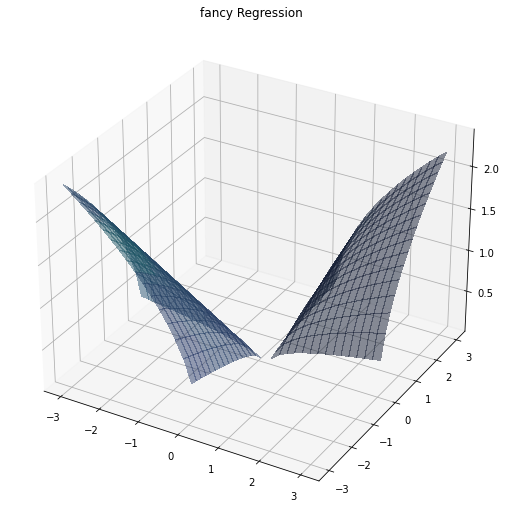

In [36]:
def our_function(coeff, data):
    """
    The function we care to optimize.

    Args:
        coeff (np.ndarray): are the parameters that we care to optimize.
        data (np.ndarray): the input data
    """
    A, B, C = coeff
    x, y, z = data.T
    return (x - A + y - B) / 2 + np.sqrt(((x - A - y + B) / 2) ** 2 + C * z ** 2)

def least_squares_residuals(coeff, data, target):
    """
    Function that returns the vector of residuals between the predicted values
    and the target value. Here we want each predicted value to be close to zero
    """
    A, B, C = coeff
    x, y, z = data.T
    prediction = our_function(coeff, data)
    vector_of_residuals = (prediction - target)
    return vector_of_residuals

data = np.array([
    [-0.071, -0.85, 0.401],
    [-0.138, -1.111, 0.494],
    [-0.317, -0.317, -0.317],
    [-0.351, -2.048, 0.848]
])
target = 0
num_coeff = 3
coeff_0 = np.ones(num_coeff)
lst_sqrs_result = scipy.optimize.least_squares(least_squares_residuals, coeff_0,
                                               args=(data, target))
coeff = lst_sqrs_result.x
lst_sqrs_output = our_function(coeff, data)
print('====================')
print('lst_sqrs_result =\n%s' % (lst_sqrs_result,))
print('---------------------')
print('lst_sqrs_output = %r' % (lst_sqrs_output,))
print('====================')

x = np.outer(np.linspace(-3, 3, 32), np.ones(32))
print(x)
y = x.copy().T # transpose
z = np.sqrt(((x - coeff[0])*(y - coeff[1]))/coeff[2])

 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_title('fancy Regression')
ax.plot_surface(x,y,z,linewidth=0, antialiased=False, shade = True, alpha = 0.5, facecolors=cm.viridis(Z1))
# surf3 = ax.plot_surface(x, y, z,
#                        cmap = my_cmap,
#                        edgecolor ='none')
# fig.colorbar(surf3, shrink=0.5, aspect=5)
plt.show()
# show plot